In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Memasukkan Packages

In [262]:


heart = pd.read_csv('K01_heart_disease.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Melihat jumlah dan jenis dari kolom

In [263]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [264]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [265]:
heart.shape

(918, 12)

In [266]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [267]:
heart.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Pasien yang terkena penyakit jantung ada 508 dari 918 pasien

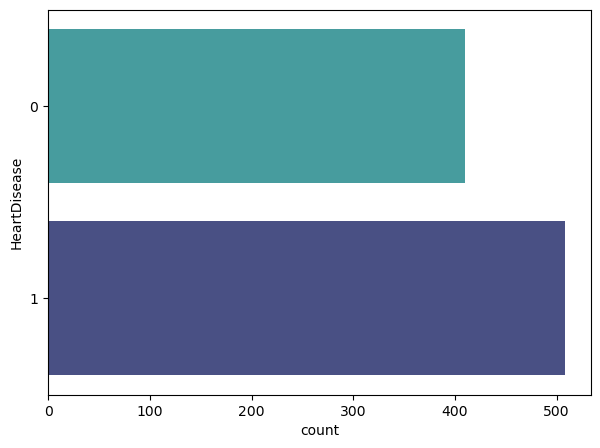

In [268]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(y="HeartDisease", data=heart, palette="mako_r");

Visualisasi dari pasien yang pengidap penyakit jantung

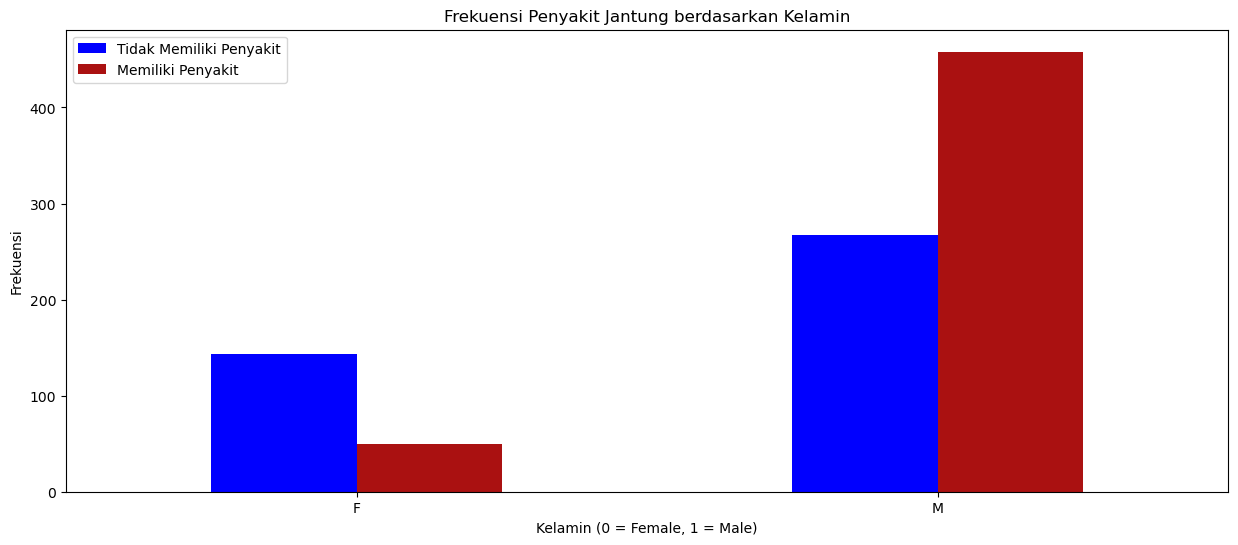

In [269]:
pd.crosstab(heart.Sex,heart.HeartDisease).plot(kind="bar",figsize=(15,6),color=['blue','#AA1111' ])
plt.title('Frekuensi Penyakit Jantung berdasarkan Kelamin')
plt.xlabel('Kelamin (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Tidak Memiliki Penyakit", "Memiliki Penyakit"])
plt.ylabel('Frekuensi')
plt.show()

Pengidap penyakit jantung berdasarkan umur

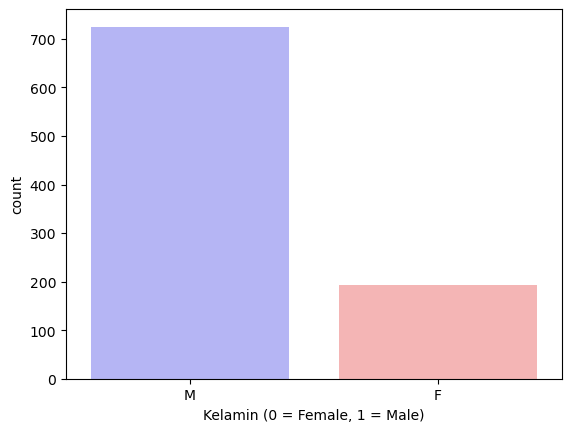

In [270]:
sns.countplot(x='Sex', data=heart, palette="bwr")
plt.xlabel("Kelamin (0 = Female, 1 = Male)")
plt.show()

Penyakit jantung berdasarkan kelamin

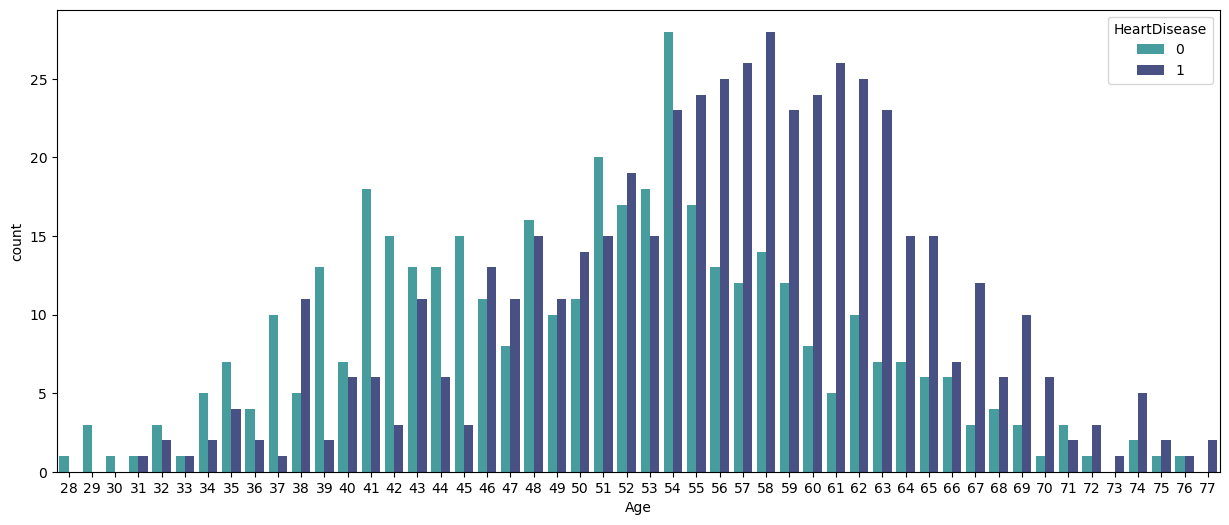

In [271]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Age', data = heart, hue = 'HeartDisease',palette='mako_r')
plt.show()

In [272]:
from sklearn.preprocessing import LabelEncoder
for col in ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']:
    le = LabelEncoder()
    heart[col] = le.fit_transform(heart[col])
    heart
    print (heart['Age'], heart['Sex'], heart['ChestPainType'], heart['RestingBP'], heart['Cholesterol'], heart['FastingBS'], heart['RestingECG'], heart['MaxHR'], heart['ExerciseAngina'], heart['Oldpeak'], heart['ST_Slope'], heart['HeartDisease'])

0      12
1      21
2       9
3      20
4      26
       ..
913    17
914    40
915    29
916    29
917    10
Name: Age, Length: 918, dtype: int64 0      M
1      F
2      M
3      F
4      M
      ..
913    M
914    M
915    M
916    F
917    M
Name: Sex, Length: 918, dtype: object 0      ATA
1      NAP
2      ATA
3      ASY
4      NAP
      ... 
913     TA
914    ASY
915    ASY
916    ATA
917    NAP
Name: ChestPainType, Length: 918, dtype: object 0      140
1      160
2      130
3      138
4      150
      ... 
913    110
914    144
915    130
916    130
917    138
Name: RestingBP, Length: 918, dtype: int64 0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Cholesterol, Length: 918, dtype: int64 0      0
1      0
2      0
3      0
4      0
      ..
913    0
914    1
915    0
916    0
917    0
Name: FastingBS, Length: 918, dtype: int64 0      Normal
1      Normal
2          ST
3      Normal
4      Normal
     

In [273]:
#Variabel Independen
x = heart.drop(["HeartDisease"], axis = 1)
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [274]:
#Variabel Dependen
y = heart["HeartDisease"]
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [277]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()

In [278]:
nbtrain = modelnb.fit(x_train, y_train)

In [279]:
predict = nbtrain.predict(x_test)

In [280]:
from sklearn.metrics import accuracy_score
print ("Akurasi scorenya sebesar : ", accuracy_score(y_test, predict)*100)

Akurasi scorenya sebesar :  80.97826086956522


In [281]:
nbtrain.class_count_

array([329., 405.])

In [282]:
y_pred = nbtrain.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [283]:
nbtrain.predict_proba(x_test)

array([[2.48532849e-04, 9.99751467e-01],
       [9.96962151e-01, 3.03784929e-03],
       [9.81847878e-01, 1.81521225e-02],
       [5.44674678e-06, 9.99994553e-01],
       [9.99586199e-01, 4.13800606e-04],
       [9.80655373e-01, 1.93446275e-02],
       [3.76489477e-01, 6.23510523e-01],
       [1.15137400e-01, 8.84862600e-01],
       [1.45907908e-03, 9.98540921e-01],
       [1.03364878e-04, 9.99896635e-01],
       [7.02125860e-06, 9.99992979e-01],
       [9.95993564e-01, 4.00643631e-03],
       [9.99542400e-01, 4.57599940e-04],
       [5.17726991e-01, 4.82273009e-01],
       [9.28125046e-01, 7.18749537e-02],
       [2.70339542e-02, 9.72966046e-01],
       [9.97778008e-01, 2.22199160e-03],
       [4.64396132e-01, 5.35603868e-01],
       [9.96927612e-01, 3.07238755e-03],
       [1.17412358e-01, 8.82587642e-01],
       [3.51906410e-04, 9.99648094e-01],
       [9.90676392e-01, 9.32360782e-03],
       [3.86036978e-01, 6.13963022e-01],
       [9.80627076e-01, 1.93729239e-02],
       [3.082678

In [284]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[60, 21],
       [14, 89]], dtype=int64)

In [285]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        81
           1       0.81      0.86      0.84       103

    accuracy                           0.81       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.81      0.81       184

